# 
In this programme I will calculate the neutron star mass and radius by solving the Tolman-Oppenheimer-Volkoff equations $:$

$\frac{dp}{dr}=-\frac{Gm(r)\epsilon(r)}{r^2c^2}\left(1+\frac{p(r)}{\epsilon(r)}\right)\left(1+\frac{4\pi r^3p(r)}{m(r)c^2}\right)\left(1-\frac{2Gm(r)}{rc^2}\right)^{-1}$

$\frac{dm}{dr}=\frac{4\pi r^2 \epsilon(r)}{c^2}$

To solve this equation we will write the rhs of this TOV Equations in rescale units $:$ energy  density and pressure are in units of $GeV/fm^3.$We write mass in units of solar mass $M_{solar}=2 \times 10^{30}$ kg and radius in units of Schwarzschild radius $R_s=\frac{2GM_{solar}}{c^2}=2.95$ km and a quantity $\alpha$ is defined as $\alpha=\frac{M_{solar}c^2}{R_s^3}=41.325$ in units of $\frac{GeV}{fm^3}$

Then the formula will take the form $:$

$\frac{dp}{dx}=-\frac{0.5\times \bar{m} \left(1+\frac{p}{\epsilon}\right) \left(1+\frac{4 \pi p}{\alpha \bar{m}}\right)}{(x^2-\bar{m}x)}$

$\frac{dm}{dx}=\frac{4 \pi x^2 \epsilon}{\alpha}$

Here $\bar{m}$ is mass in units of solar mass and $x$ is  the radial distance in units of Schwarzchild radius.

Here we will use a simple equation of state for a non-interacting gas of neutrons.The equation of state is specified through a simple  numerical fitting formula $:$
    
$\epsilon(p)= a_{nr}p^{\frac{3}{5}}+a_r p$ where $a_{nr}$ and $a_{r}$ are constants we have to choose properly.

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math

Here we have defined a function called $"tovrhs"$ that takes two parameters $:$ $"initial$" and $"x"$. This function calculates the right-hand side $(RHS)$ of the Tolman-Oppenheimer-Volkoff $(TOV)$ equations.Assuming $'initial'$ is a list like object we have assigned first element of this list to the $"p"$ variable and second element of the list to the $"m"$ variable.
Then we have called a function $"eos"$ with $"p"$  variable as an argument and assigned the returned value to the variable $"𝜖"$.It calculates the energy density based on the given pressure.Then we have assigned the components of rhs of the $"TOV"$ equations by $"one"$ and $"two"$ and the calculated values of $"one"$ and $"two"$ are stored in a list $"f"$ which is returned as the output of the $"tovrhs"$ function.

In [2]:
def tovrhs(dep_variables,x):#This function takes two parameters "initial" and "x" that represent the inputs. 
    p=dep_variables[0] #Here the first element in the initial list is assigned to variable "pres"
    𝑚=dep_variables[1] #Here the second element in the initial list is assigned to variable "mass"
    𝛼=41.325 #alfa= (M_solar*c**2/R_s**3) in units of GeV/fm^3
    𝜖=eos(p) #Here an equation of state is called as a function of pressure and is assigned to the energy density 
    one=-0.5*𝜖*m*(1+(p/𝜖))*(1+(4*np.pi/𝛼)*(p/m)*x**3)/(x**2-m*x) #RHS of the TOV equation dp/dr
    two=4*np.pi*x**2*𝜖/𝛼 # RHS of the TOV Equation dm/dr
    f=[one,two] #it stores the calculated values from the previous lines into a list f. 
    return f

 Below we have defined a function $eos$ which has taken a parameter $p$ representing pressure. Then we have assigned the values to the coefficients $a_{nr}$ and $a_r$.These values are coefficients used in a fit to the non-interacting neutron matter pressure.
Then a conditional statement is used to handle the case where given pressure is non-negative.It sets a small positive pressure value $10^{-8}$ $GeV/fm^3$ to avoid undefined behaviour that could occur when using non-positive value.
The last line calculated the equation of state value and the calculated value is returned as the output of the function.

In summary the function $eos$ has taken a pressure value as an input . If pressure is non-negative it sets a very small value if necessary,Then it calculated the equation of state using the given pressure and returned the result.

In [3]:
def eos(p):
    anr=4.015 #These are basically coefficients used in the fit to the non-interacting neutron matter pressure.
    ar=2.137
    if p<=0: # It is used to handle the case where given pressure is non-negative.It sets a small positive pressure value to avoid undefined behaviour that could occur when using non-positive value.
        p=1.e-8
    return anr*p**(3/5)+ar*p

In below a function $tsolve$ is called with two arguments $p0$ and $xfinal$ representing central pressure and final value of the independent variable respectively.

Then the function $eos$ is called with central pressure as an argument and the returned value is assigned to the variable $𝜖$.It calculates the energy density based on the given central preesure.

$dx$ represents the step size in the independent variable $x$ and is used for numerical integration.

Then the initial conditions for the $TOV$ equations are written in a form of tupple assigned to the variable $initial$ containing the central pressure $p0$ and initial mass calculated using the formula $\frac{4}{3}\pi \epsilon d(x^3)/\alpha$.

Now an array $X$ is created which represents the values of the independent variable over which the differential equations will be solved.

Then the differential equations are solved using $spi.odeint()$.It uses the $"tovrhs"$ as the ODE system,the initial conditions from $"initial"$ and the array of values $"X"$.

Variables "rstar","mstar","count"  are initialized with value 0. They are used to store values related to some physical quantities.By setting it zero initially,it ensures that variables are initialized before any calculations or updates are performed.$"rstar"$  and  $"mstar"$ represent final value of radial distance or radius and mass respectively i.e., the radial distance and at last iteration of the loop.

Next, three empty lists $"m"$,$"r"$,$"p"$ are created to store updated values of $"rstar"$,$"mstar"$ and pressure$("i")$ during the  each loop iteration.

Now,a loop is started that iterates over the values in the first column $([:,0])$ of $"tov_sol"$ array,$"tov_sol"$ is an array returned by the $"odeint"$ solver in the $"tsolve"$ function. It contains the solution to the TOV equations. In this context, it's a 2D array where each row represents a time step and each column represents a different variable..Each value represents a pressure at a particular iteration.

Then if the pressure $"i"$ is greater than $10^{-7}$,the $"count"$ variable  is incremented by $1$, the values of $"rstar"$ and $"mstar"$ are updated and then appended to the the $"r"$ and $"m"$ list respectively.Finally, it appends the current value of pressure to the $"p"$ list.

$"count"$ serves as a counter variable that keeps track of the number of iterations or steps in which the pressure $"i"$ is greater than $1.e-7$. It is used to access and store specific values related to the $ mass (mstar)$ from the $tov_sol$ array.

Then fuction $tsolve$ returns the final values of the radial distance $"(rstar)"$and mass $"(mstar)"$ as well as the lists $"r"$, $"m"$, and $"p"$, which contain the updated values of the radial distance, mass, and pressure at each iteration of the loop as output of it as a tuple. 

$F$ is the resulting tuple contains all these quantities.

In [4]:
def tsolve(p0,xfinal): # This function takes two parameters "pcent" that raprents central pressure and "xfinal" is final value of independent parameters.
    𝛼=41.325
    
    𝜖=eos(p0)
    
    dx=0.00025 #This represents the step size in independent variables.
    
    initial=p0,4*np.pi*𝜖*dx**3/(3*𝛼) #This line caculates the initial conditions of differential equations.It assigns a tuple to the variable "initial" containing the "central pressure(pcent)" and "initial mass((4 * np.pi ** eden * dx ** 3 / (3 * alfa)))
    X=np.arange(dx,xfinal,dx) #This line generates an array using np.arange()
    
    tov_sol=spi.odeint(tovrhs,initial,X) #It solves the ordinary differential equations using the "tovrhs" function,initial conditions "initial" and array of values "x".
    
    rstar=0 #We initialize "rstar","mstar","count" with value 0. They are used to store values related to some physical quantities.By setting it zero initially,it ensures that variables are initialized before any calculations or updates are performed
    mstar=0
    count=0
    
    m=[] # These are the three empty lists are created to store updated values of rstar,mstar and i
    r=[]
    p=[]
    k=[]
    for i in tov_sol[:,0]: #This starts a loop that iterates over the values in the first column ([:, 0]) of the tov_sol array.Each value represent the pressure.
        
        if i>1.e-7:
            count=count+1
            rstar=rstar+2.95*dx
            r.append(rstar) #It appends the current value of rstar to the list r.It stores the values of the radial distance.
            mstar=tov_sol[count,1] #This line assigns the value from tov_sol array at index "[count,1]" to the variable "mstar".It represents the mass at thecurrent iteration.
            m.append(mstar) #It appends the current value of mstar to the list m.It stores the values of the mass.
            p.append(i)#It appends the current value of "i" to the list w.It stores the values of the pressure.
            k.append(i*(1.6*10**36))
    return rstar,mstar,r,m,p,k #Finally the values of "rstar","mstar","r","m","w" are returned as a tuple.

F=tsolve(0.15,10) #It assigns the returned tuple from "tsolve" to the variable F,i.e.,F becomes a tuple containing the values returned by the "tsolve" function.


Here I have got total radius $ 10.91km$ and total mass value $0.751M_{solar}$

In [5]:
print(F[0],F[1])

10.156112499996972 0.7867566786389955


In [17]:
print(F[4])

[0.15, 0.14999997756827896, 0.14999994261044486, 0.14999989595550778, 0.14999983779287923, 0.1499997681430978, 0.14999968963956925, 0.14999960064795242, 0.14999950071103324, 0.14999938949784192, 0.14999926690550508, 0.1499991311631704, 0.14999898262729172, 0.1499988219611892, 0.1499986491648628, 0.14999846423831253, 0.1499982671815384, 0.14999805837798663, 0.14999783787187942, 0.14999760543152102, 0.14999736105691144, 0.14999710474805067, 0.14999683650493872, 0.149996555353353, 0.14999626506603747, 0.1499959629156529, 0.14999564895042045, 0.14999532321856124, 0.14999498576829642, 0.1499946369019731, 0.1499942770075029, 0.14999390578725527, 0.149993523313219, 0.1499931296573828, 0.14999272489173543, 0.14999230908826566, 0.1499918823189622, 0.14999144465581385, 0.14999099637755803, 0.1499905379748241, 0.1499900691404911, 0.14998958997030237, 0.1499891005600013, 0.14998860100533123, 0.1499880914020355, 0.14998757184585748, 0.14998704243254052, 0.14998650219013984, 0.1499859451313797, 0.14

This is the plot of mass$(GeV/fm^3)$ vs radial distance $(km)$.The value of radial distance where the mass saturates gives us total radius value.

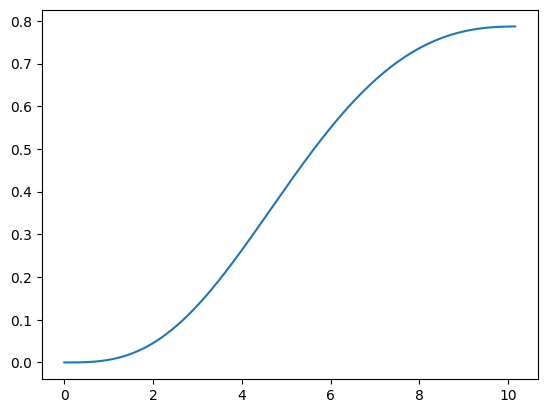

In [6]:
plt.plot(F[2],F[3])
plt.show()

This is the plot of pressure $(GeV/fm^3)$ vs radial distance$(km)$.The value of radial distance where pressure tends to zero gives us outer radius of the star.

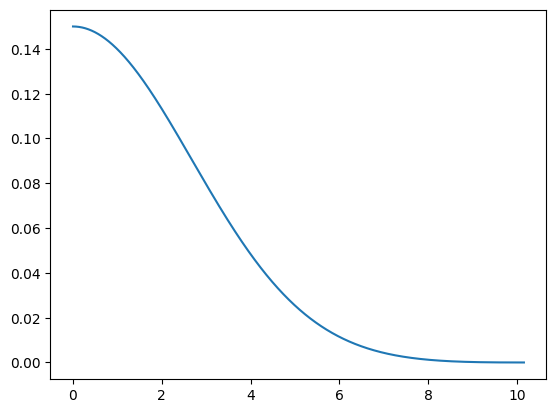

In [7]:
plt.plot(F[2],F[4])
plt.show()

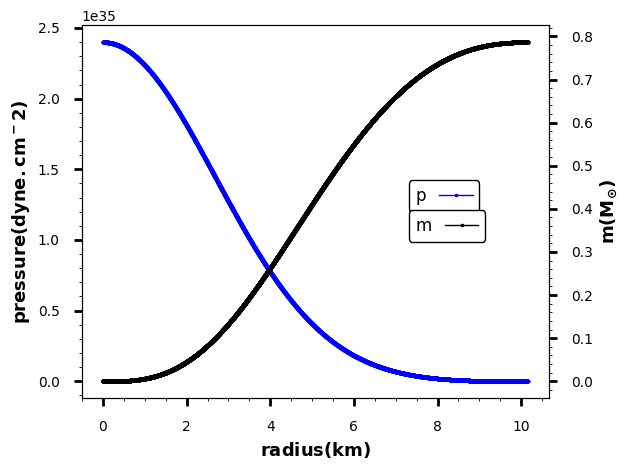

In [8]:
fig, ax1=plt.subplots()
ax1.set_xlabel("$\mathbf{radius(km)}$",style="italic",weight="black",labelpad=4,size=13)
ax1.set_ylabel("$\mathbf{pressure(dyne.cm^-2)}$",style="italic",weight="black",labelpad=4,size=13)
ax1.plot(F[2],F[5],label='p',marker="o", color="blue",ms=1.5,mfc="k",ls="solid",lw=1)
plt.minorticks_on()
plt.legend(loc=(0.7,0.5),framealpha=1,facecolor="white",edgecolor="black",fontsize=12,markerfirst=False)
ax2 = ax1.twinx()
ax2.set_ylabel('$\mathbf{m (M_{\odot})}$',color="black",size=13,style="italic",weight="black",labelpad=4) 
ax2.plot(F[2],F[3],label='m', color="black",marker="s",ms=1.5,mfc="k",ls="solid",lw=1)
plt.minorticks_on()
ax2.tick_params(axis='y', labelcolor="k",width=2,length=6,direction="out",pad=10,right=True)
ax1.tick_params(axis='x', labelcolor="k",width=2,length=6,direction="out",pad=10)
ax1.tick_params(axis='y', labelcolor="k",width=2,length=6,direction="out",pad=10)
fig.tight_layout() # otherwise the right y-label is slightly clipped,
plt.legend(loc=(0.7,0.42),framealpha=1,facecolor="white",edgecolor="black",fontsize=12,markerfirst=False)
plt.show()

A function "M_R" is called that take two parameters $"pmin"$ and $"pmax"$ representing minimum and maximum value of pressure.

$"imax"$ represents maximum number of iterations in the subsequent loop.

Here three numpy arrays  $"p0"$,$"M"$,$"R"$ of desired size("imax")  are created and their all elements are initially set to zero.These arrays will store the values of the pc,radius,mass during the iteration of the loop.

Then a loop is started which iterates over the range of $"imax"$ which is from $0$ to $29$ $(30$iterations$)$.In each iteration it calculates the value of $"p0[i]"$ based on the index $"i"$.

Then the radius and mass is calculated at index $"i"$ by calling the $"tsolve"$ function with $"p0[i]"$ as the central pressure and $10$ as the $"xfinal"$ value. The $"tsolve"$ function returns a tuple containing $(rstar, mstar, r, m, p)$.Since the radius  and mass is stored at index $0$ and $1$ respectively within the tuple, $[0]$ and $[1]$ is used to access radius and mass value .The calculated radius and mass are then assigned to $"R[i]"$ and $"M[i]"$.
Here $"tsolve"$ function is utilized to calculate the radius and mass for each $"p0[i]"$ value within a loop.The resulting values are stored in the R and M arrays, respectively, at the corresponding indices $i$.The formula $p0[i] = pmin + \frac{(pmax - pmin) * (i)}{500}$ is used to generate a sequence of values for the central pressure $(p0)$ within a given range$ [pmin, pmax]$. It evenly distributes the range of central pressures ($pmin$ to $pmax$) into $imax$ equally spaced values.

Next,the function will return these three arrays $(p0,R,M)$ as a tuple.Each array contains the values calculated during the loop and order of the arrays in the tuple mathches the order in which they are listed in the return statement.

The returned tuple is assigned to the variable $"T"$ from "M_R" function.$T$ contain three arrays $:$ $T[0]$ will be the "p0" array, $T[1]$ will be the "R" array, and $T[2]$ will be the "M" array.

In [9]:
def M_R(pmin,pmax):
    imax=500 # It represents the maximum number of iterations in the subsequent loop.
    p0=np.zeros(imax) # Here a numpy array pc of desired size("imax")  is created and its all elements are initially set to zero.This array will store the values of pc during the iteration of the loop.
    M=np.zeros(imax)
    R=np.zeros(imax)
    k0=np.zeros(imax)
    for i in range(imax):
        p0[i]=pmin + (pmax-pmin)*(i)/500 # in each iteration this line calculates the value of pc[i] based on the index i.
        k0[i]=(pmin + (((pmax-pmin)*(i))/500))*(1.6*(10**36))#in dyne.cm^-2
        
        R[i]=tsolve(p0[i],10)[0]
        # This line calculates the radius at index i by calling the tsolve function with pc[i] as the central pressure and 10 as the xfinal value. The tsolve function returns a tuple containing (rstar, mstar, r, m, w). Since the radius is stored at index 0 within the tuple, [0] is used to access that value. The calculated radius is then assigned to radius[i].
        M[i]=tsolve(p0[i],10)[1]
        #  These lines utilize the tsolve function to calculate the radius and mass for each pc[i] value within a loop. The resulting values are stored in the radius and mass arrays, respectively, at the corresponding indices i.
    return p0,R,M,k0 #The function will return these three arrays as a tuple.Each array contains the values calculated during the loop and order of the arrays in the tuple mathches the order in which they are listed in the return statement.

T=M_R(0.01,2.5) # This is the resulting tuple containing three arrays: T[0] will be the "pc" array, T[1] will be the "radius" array, and T[2] will be the "mass" array.

In [10]:
print (T[0])
print(T[1]) 
print(T[2])

[0.01    0.01498 0.01996 0.02494 0.02992 0.0349  0.03988 0.04486 0.04984
 0.05482 0.0598  0.06478 0.06976 0.07474 0.07972 0.0847  0.08968 0.09466
 0.09964 0.10462 0.1096  0.11458 0.11956 0.12454 0.12952 0.1345  0.13948
 0.14446 0.14944 0.15442 0.1594  0.16438 0.16936 0.17434 0.17932 0.1843
 0.18928 0.19426 0.19924 0.20422 0.2092  0.21418 0.21916 0.22414 0.22912
 0.2341  0.23908 0.24406 0.24904 0.25402 0.259   0.26398 0.26896 0.27394
 0.27892 0.2839  0.28888 0.29386 0.29884 0.30382 0.3088  0.31378 0.31876
 0.32374 0.32872 0.3337  0.33868 0.34366 0.34864 0.35362 0.3586  0.36358
 0.36856 0.37354 0.37852 0.3835  0.38848 0.39346 0.39844 0.40342 0.4084
 0.41338 0.41836 0.42334 0.42832 0.4333  0.43828 0.44326 0.44824 0.45322
 0.4582  0.46318 0.46816 0.47314 0.47812 0.4831  0.48808 0.49306 0.49804
 0.50302 0.508   0.51298 0.51796 0.52294 0.52792 0.5329  0.53788 0.54286
 0.54784 0.55282 0.5578  0.56278 0.56776 0.57274 0.57772 0.5827  0.58768
 0.59266 0.59764 0.60262 0.6076  0.61258 0.61756 0.62

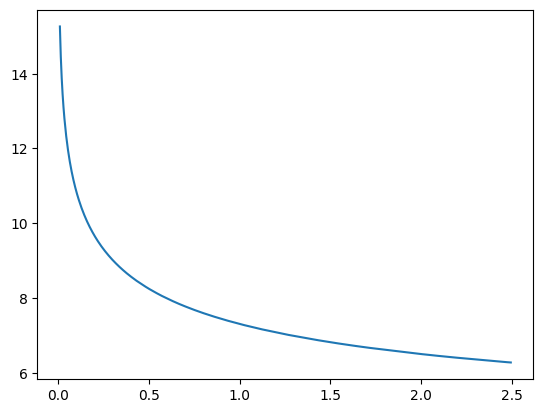

In [11]:
plt.plot(T[0],T[1])
plt.show()

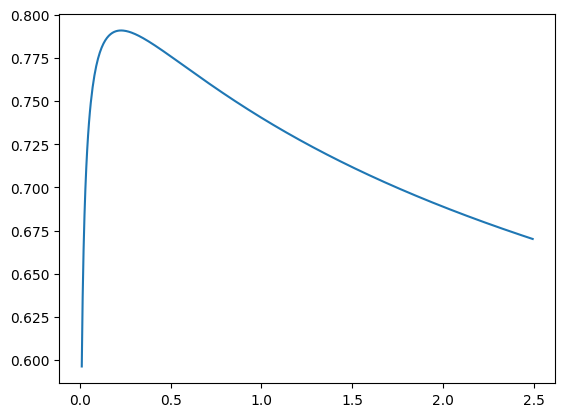

In [12]:
plt.plot(T[0],T[2])
plt.show()

Pressure at maximum mass: 3.665920000000001e+35
Maximum Mass Value: 0.7909035668107759
Radius at maximum mass: 9.450324999997342


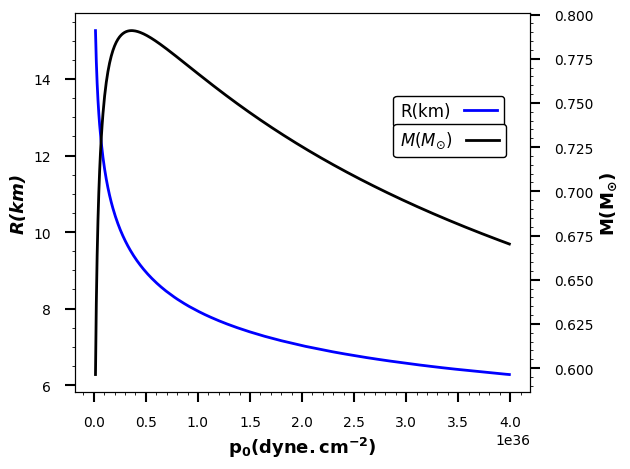

In [13]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('$ \mathbf{p_0(dyne.cm^{-2})}$',style="italic",weight="black",labelpad=4,size=13)
ax1.set_ylabel("R(km)",size=13,color="black",style="italic",weight="black",labelpad=4)
ax1.plot(T[3],T[1],label='R(km)',color="blue",ls="solid",lw=2)
plt.minorticks_on()
plt.legend(loc=(0.7,0.7),framealpha=1,facecolor="white",edgecolor="black",fontsize=12,markerfirst=False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('$\mathbf{M(M_{\odot})}$',color="black",size=13,style="italic",weight="black",labelpad=4)  # we already handled the x-label with ax1
ax2.plot(T[3],T[2],label='$M(M_{\odot})$', color="black",ls="solid",lw=2)
plt.minorticks_on()
ax2.tick_params(axis='y', labelcolor="k",width=1.5,length=7,direction="out",pad=10,right=True)
ax1.tick_params(axis='x', labelcolor="k",width=1.5,length=7,direction="out",pad=10)
ax1.tick_params(axis='y', labelcolor="k",width=1.5,length=7,direction="out",pad=10)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(loc=(0.7,0.62),framealpha=1,facecolor="white",edgecolor="black",fontsize=12,markerfirst=False)
#plt.title("Calculated masses and radii for white dwarfs using the relativistic polytropic EoS.",style="italic",color="black",pad=15,size=18,weight="black")
max_mass_index = np.argmax(T[2])
pressure_at_max_mass = T[3][max_mass_index]
radius_at_max_mass = T[1][max_mass_index]

print("Pressure at maximum mass:", pressure_at_max_mass)
print("Maximum Mass Value:", T[2][max_mass_index])
print("Radius at maximum mass:", radius_at_max_mass)
plt.show()

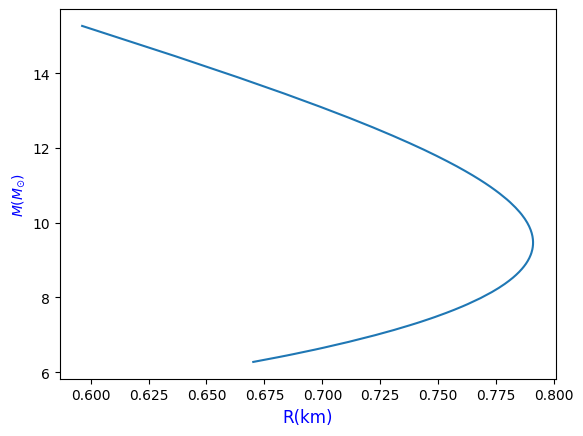

In [14]:
plt.plot(T[2],T[1])
plt.xlabel("R(km)",size=12,color="blue",weight=300)
plt.ylabel('$M(M_{\odot})$',color="blue",weight=300)
#plt.xlim(12,25)

plt.show()